In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")

sns.set(style="whitegrid", color_codes=True)

In [3]:
from matplotlib.image import imread

def display_conf_matrix_image():
    plt.rc('figure', figsize=(12,7))
    img_1, img_2 = imread('./images/Confusion_Matrix.png'), imread('./images/confusion-matrix-sci.jpg')
    fig, ax = plt.subplots(1, 2)
    
    sns.set(style="dark")
    
    ax[0].imshow(img_1)
    ax[0].grid(False)
    ax[0].set(xticklabels=[], yticklabels=[])
    ax[0].set_title("Day to Day Case")
    ax[1].imshow(img_2)
    ax[1].grid(False)
    ax[1].set(xticklabels=[], yticklabels=[])
    ax[1].set_title("In the Scikit Learn Library")
    plt.show()

# What is Logistic Regression ?

Logistic Regression is a statistical model that is used in classification and predictive analysis. This model is also know as Logit and it is characterized by a single binary dependent variable, i. e. a variable that only can take two values, often labeled as 0 and 1. Binary values are widely udsed in statistics to model the probablity of a certain event occuring, such as the probability of a pacient being health, a tumor being malignant or not, if an email is spam or not and if a team win or loose. Therefore, Logistic Regression has a large variety of applications.

The logistic function is defined by:

$$ p(x) = \dfrac{1}{1+e^{-(x-\mu)/s}} $$
where $\mu$ is the midpoint of the curve ($p(\mu)=1/2$) and $s$ a scale parameter that determines the spread of the probability distribution. This function is also called **sigmoid function**, because of its 's' shape.

$$ p(x) = \dfrac{1}{1+e^{-(\beta_0 + \beta_1 x)}} \,,$$ 
where $\beta_0 = -\mu/s$ is the intercept of the line $y = \beta_0 + \beta_1 x$ and $\beta_1 = 1/s$ is its slope. The parameter $\beta_0$ is also called "bias" and $\beta_1$ "weights". The particular values of these quantities that maximizes the likelyhood function are what we need to find to make predictions.

In [4]:
import numpy as np

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x_sig = np.linspace(-10, 10, 1000)
y_sig = sigmoid(x_sig)

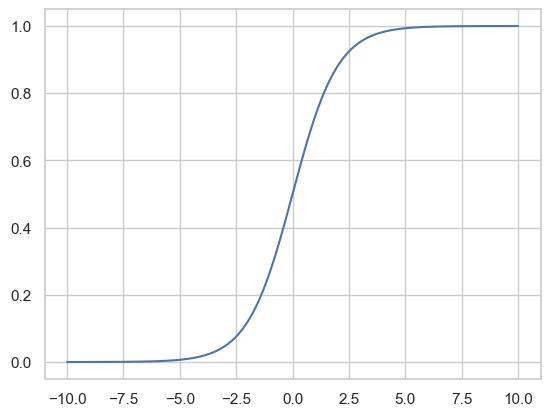

In [5]:
plt.plot(x_sig, y_sig)

## Creating a sigmoid function

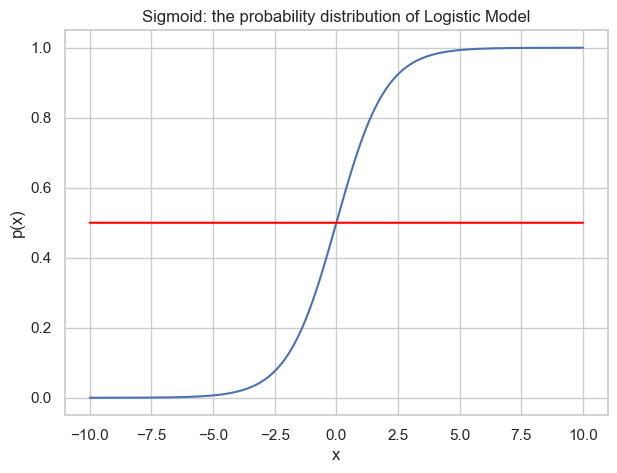

In [6]:
import numpy as np # Importing a linear algebra package

def sigmoid(beta_1, beta_0, x):
    return 1/(1+np.exp(-(beta_1*x-beta_0)))

# Creating a Plot through the above Described Sigmoid Function
x = np.linspace(-10,10,10000) # -10 to 10 -> equivalently spaced 10,000
y = sigmoid(1,0,x)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.plot(x, np.zeros(shape=x.shape) + 0.5, color='red')
plt.title("Sigmoid: the probability distribution of Logistic Model")
plt.xlabel(xlabel="x")
plt.ylabel(ylabel="p(x)")
plt.show()

# Importing Datasets

In [7]:
import pandas as pd

test_df = pd.read_csv('./data/Titanic Dataset/test.csv')
train_df = pd.read_csv('./data/Titanic Dataset/train.csv')
result_df = pd.read_csv('./data/Titanic Dataset/gender_submission.csv')

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print(f"Number of Samples in the Train Data is {train_df.shape[0]} and the corresponding features are {train_df.shape[1]-1}.")
print(f"Number of Samples in the Test Data is {test_df.shape[0]} and the corresponding features are {test_df.shape[1]}.")

Number of Samples in the Train Data is 891 and the corresponding features are 11.
Number of Samples in the Test Data is 418 and the corresponding features are 11.


In [11]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Quality and Missing Value Assessment

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age Analysis

In [13]:
train_df['Age'].mean(), np.median(train_df.loc[~train_df.Age.isnull(), "Age"])
test_df['Age'].mean(), np.median(test_df.loc[~test_df.Age.isnull(), "Age"])
train_df.Age.min(),train_df.Age.max()

(np.float64(0.42), np.float64(80.0))

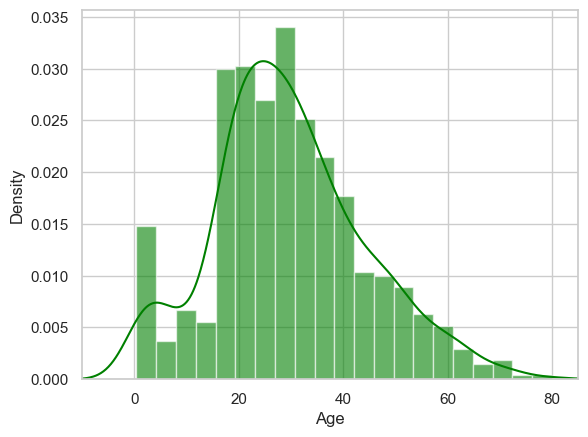

In [14]:
ax = train_df.Age.hist(bins=21, density=True, stacked=True, color="green", alpha=0.6)
train_df.Age.plot(kind='density', color='green')
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

In [15]:
# Adding value of median
train_df.loc[train_df.Age.isnull(), "Age"] = np.median(train_df.loc[~train_df.Age.isnull(), "Age"])
test_df.loc[test_df.Age.isnull(), "Age"] =  np.median(train_df.loc[~train_df.Age.isnull(), "Age"])

## Cabin Analysis

In [16]:
f"Percentage of Missing 'Cabin' Records is %.2f%%." % ((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100)

"Percentage of Missing 'Cabin' Records is 77.10%."

In [17]:
# Dropping Data
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

## Embarked Analysis

In [18]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [19]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

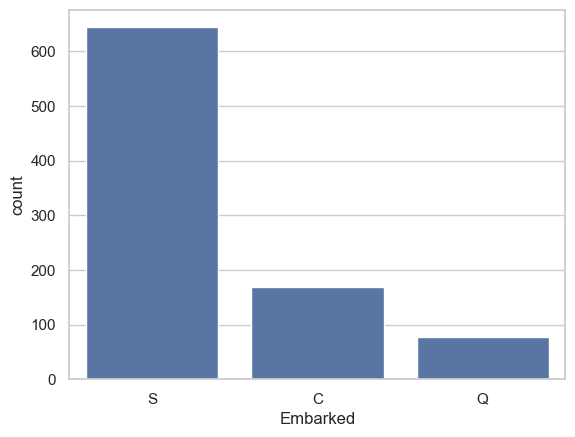

In [20]:
sns.countplot(x='Embarked', data=train_df)
plt.show()

In [21]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = 'S'

In [22]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

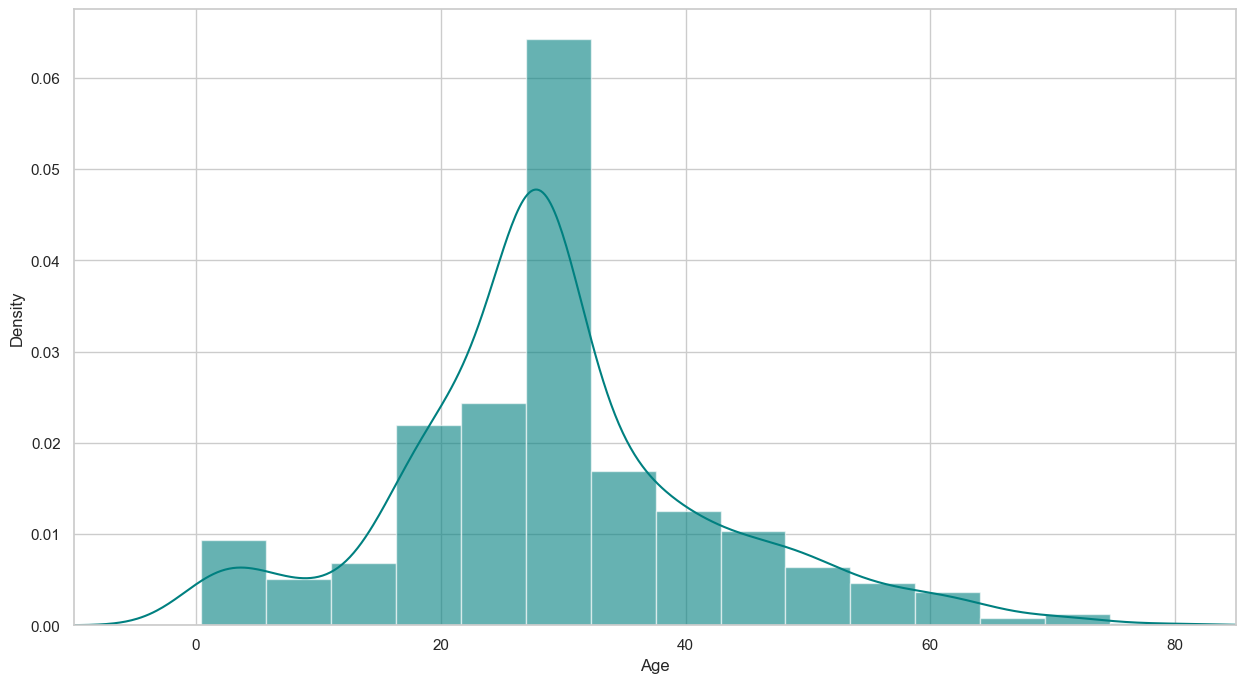

In [23]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# Filling up median in test data .... 1 Missing

In [24]:
group_df = test_df.groupby(['Embarked', 'Pclass']).agg(
    {'Fare': ('count','mean', 'median')},
)

# Here we have a large change between mean and median so we add the median value as a safety measure in the code block below
group_df

# np.nanmean(test_df[(test_df.Pclass_3 & test_df.Embarked_S)].Fare), np.nanmedian(test_df[(test_df.Pclass_3 & test_df.Embarked_S)].Fare)

Fare                      
                count        mean    median
Embarked Pclass                            
C        1         56  110.073511  75.24585
         2         11   20.120445  15.04580
         3         35   10.658700   7.22920
Q        1          1   90.000000  90.00000
         2          4   11.273950  11.52915
         3         41    8.998985   7.75000
S        1         50   76.677504  51.67085
         2         78   23.056090  21.00000
         3        141   13.913030   8.05000

In [25]:
group_df = test_df.groupby(['Pclass', 'Sex']).agg(
    {'Sex': ('count', )}
)

total_data_points = sum(group_df['Sex', 'count'])

group_df["Sex Percentage"] = round((group_df['Sex', 'count'] / total_data_points) * 100, 2)
group_df['Sex Percentage'] = group_df['Sex Percentage'].astype(np.float16)
group_df

C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


Sex Sex Percentage
              count               
Pclass Sex                        
1      female    50      11.960938
       male      57      13.640625
2      female    30       7.179688
       male      63      15.070312
3      female    72      17.218750
       male     146      34.937500

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

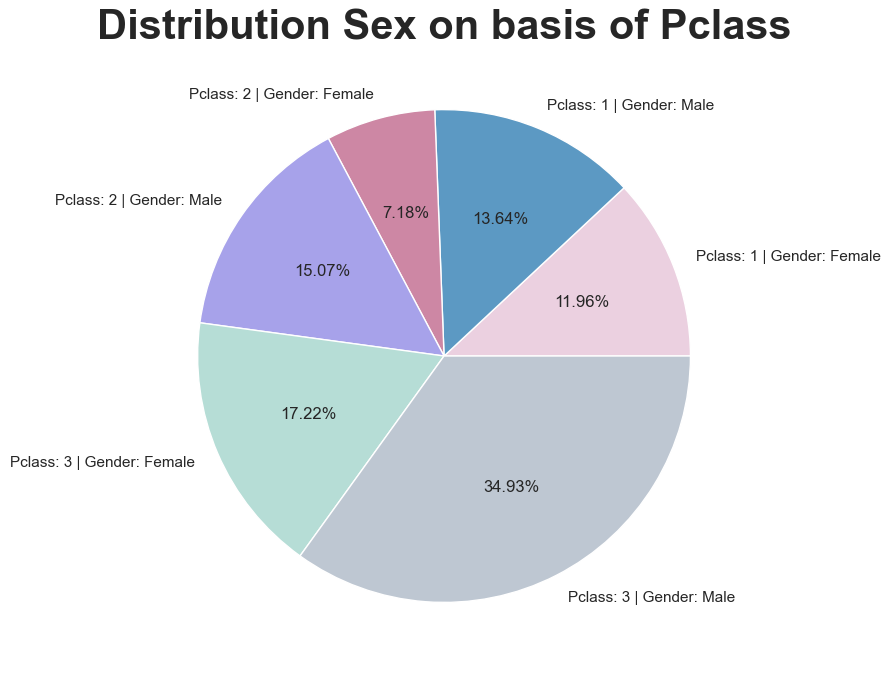

In [26]:
labels = [f'Pclass: {pclass} | Gender: {gender.capitalize()}'.format() for pclass, gender in group_df.index]
values = [group_df.loc[x, 'Sex Percentage'] for x in group_df.index]

np.random.seed(420)
def generate_normalized_randoms():
    return np.round(np.random.randint(0, 255, 4)/255, 2)

colors = [generate_normalized_randoms() for _ in labels]

plt.rc('figure', figsize=(15,8))

# plt.figure(figsize=(15,8))
plt.pie(values, labels = labels,autopct= '%1.2f%%', wedgeprops={'edgecolor': 'white'}, colors=colors)
plt.title("Distribution Sex on basis of Pclass", fontweight='bold', fontdict={'size': 30})
plt.savefig()

In [27]:
# this shows that mean is not a proper estimator and hence we can use median as ..
test_df.loc[(test_df.Fare.isnull()), 'Fare'] = 8

## Feature Engineering

In [28]:
train_df['TravelAlone'] = np.where((train_df["SibSp"]+train_df.Parch) > 0, 0, 1)

In [29]:
test_df['TravelAlone'] = np.where((test_df["SibSp"]+test_df.Parch) > 0, 0, 1)

In [30]:
train_df.drop(['SibSp', 'Parch'] ,axis=1 ,inplace=True)
test_df.drop(['SibSp', 'Parch'] ,axis=1 ,inplace=True)

## Dropping Unrequired Features ...

In [31]:
train_df=pd.get_dummies(train_df, columns=["Pclass","Embarked","Sex"])

In [32]:
train_df.drop(['Sex_female', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [33]:
train_df.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [34]:
test_df = pd.get_dummies(test_df, columns=["Pclass","Embarked","Sex"])

In [35]:
test_df.drop(['Sex_female', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [36]:
test_df

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,1,False,False,True,False,False,True,True
414,39.0,108.9000,1,True,False,False,True,False,False,False
415,38.5,7.2500,1,False,False,True,False,False,True,True
416,28.0,8.0500,1,False,False,True,False,False,True,True


In [37]:
cols = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'TravelAlone']
train_df[cols].corr()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,TravelAlone
Age,1.000000,0.096688,0.323896,0.015831,-0.291955,0.030248,-0.031415,-0.006729,0.081163,0.171647
Fare,0.096688,1.000000,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,-0.182333,-0.271832
Pclass_1,0.323896,0.591711,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.098013,-0.113364
Pclass_2,0.015831,-0.118557,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.064746,-0.039070
Pclass_3,-0.291955,-0.413333,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.137143,0.129472
Embarked_C,0.030248,0.269335,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.082853,-0.095298
Embarked_Q,-0.031415,-0.117216,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,-0.074115,0.086464
Embarked_S,-0.006729,-0.162184,-0.161921,0.189980,-0.015104,-0.782742,-0.499421,1.000000,0.119224,0.029074
Sex_male,0.081163,-0.182333,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.119224,1.000000,0.303646
TravelAlone,0.171647,-0.271832,-0.113364,-0.039070,0.129472,-0.095298,0.086464,0.029074,0.303646,1.000000


<Axes: >

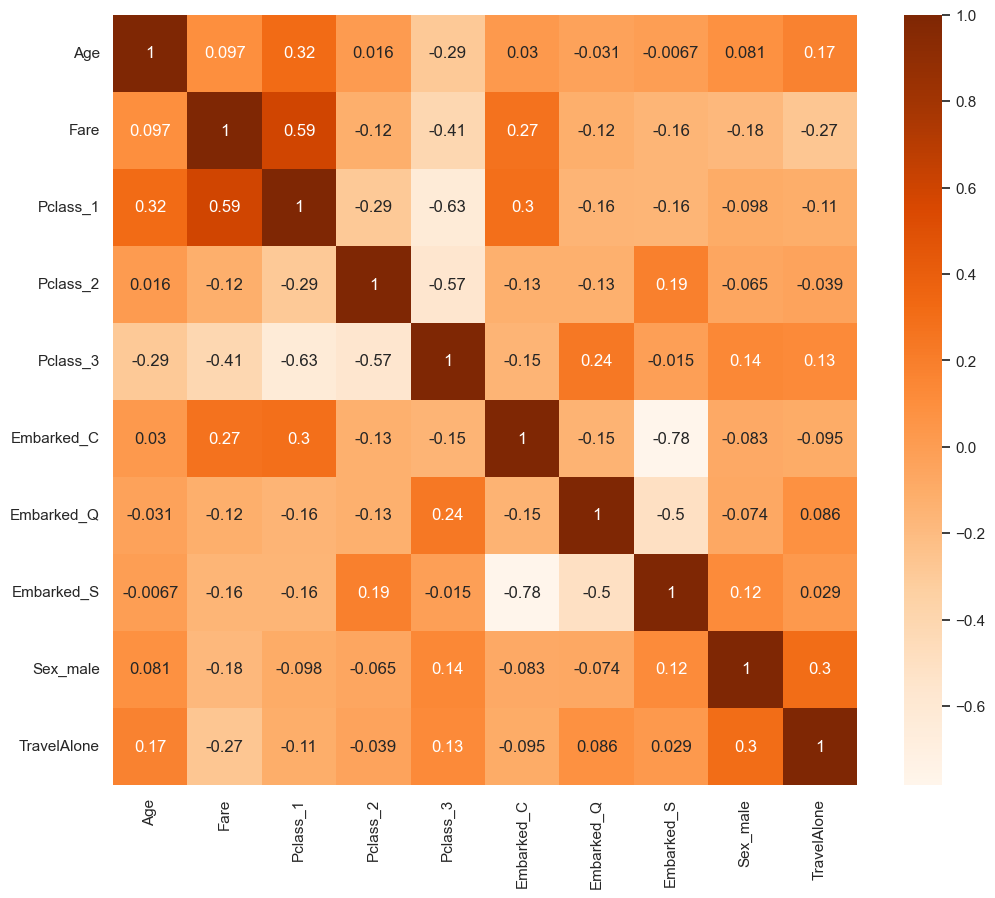

In [38]:
# Let us also view the corelation of these values heat map as ...
cols = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'TravelAlone']
plt.rc('figure', figsize=(12, 10))
sns.heatmap(train_df[cols].corr(), annot=True, cmap='Oranges')

# Modeling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [40]:
X = train_df[cols]
y = train_df['Survived']

model = LogisticRegression(max_iter=5000)
model.fit(X, y)

LogisticRegression(max_iter=5000)

# RFECV Introduction Only ...

In [41]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(max_iter=5000), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=10, estimator=LogisticRegression(max_iter=5000), scoring='accuracy')

In [39]:
# As we don't have fare in the current array that means that the fare was the least required features among ont once passed into regressio model ...
rfecv.get_feature_names_out()

array(['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'TravelAlone'],
      dtype=object)

# Analyzing Model Created ...

In [42]:
# Getting Predictions from Model Created
predictions = model.predict(test_df[cols])
values = result_df.Survived

In [43]:
# Necessary Imports
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion Matrix

A confusion matrix, also known as an error matrix, is a performance measurement tool for classification problems in machine learning. It's a square matrix that displays the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by a classification model on a dataset. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

Here's a breakdown of the components of a confusion matrix:

1\.  True Positive (TP): These are the cases where the model correctly predicts the positive class.<br>
2\.  True Negative (TN): These are the cases where the model correctly predicts the negative class.<br>
3\.  False Positive (FP): Also known as Type I error, these are the cases where the model incorrectly predicts the positive class when the actual class is negative.<br>
4\.  False Negative (FN): Also known as Type II error, these are the cases where the model incorrectly predicts the negative class when the actual class is positive.

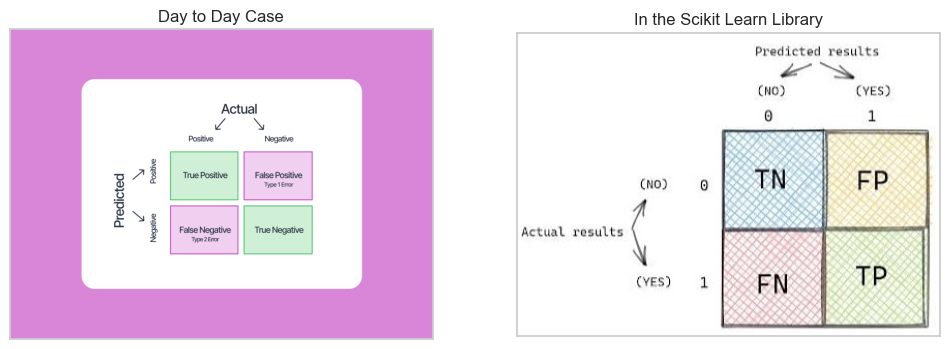

In [42]:
display_conf_matrix_image()

From the confusion matrix some other values can be calculated each having different meanings to them as listed below.
## Precision
It is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. In simpler terms, it answers the question: "Of all the instances the model classified as positive, how many were actually positive?". Mathematically, precision is calculated as:

$$ precision = \dfrac{TP}{FP+TP} $$

## Recall

Recall (also known as sensitivity or true positive rate) is a measure of the ability of a classification model to identify all relevant instances (true positives) in a dataset. It calculates the proportion of actual positive cases that were correctly identified by the model out of all actual positive cases. Mathematically, recall is defined as:

$$ precision = \dfrac{TP}{FN+TP} $$

## F1 Score
The F1 score, also known as the F1 measure or F1 value, is a metric used to evaluate the performance of a classification model. It considers both precision and recall to provide a single score that balances these two metrics. The F1 score is the harmonic mean of precision and recall, giving equal weight to both metrics. It is calculated using the following formula:
$$ score = \dfrac{2 * precision * recall}{precision + recall} $$

array([[254,  12],
       [  7, 145]])

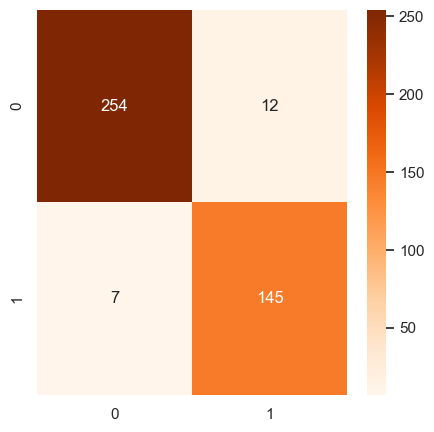

In [43]:
# Generating a Confusion Matrix ...
plt.figure(figsize=(5,5))
cf = confusion_matrix(values, predictions)
sns.heatmap(cf, annot=True, cmap='Oranges', fmt='d')
cf

In [44]:
precision = precision_score(values, predictions)
recall = recall_score(values, predictions)
f1_score = f1_score(values, predictions)

In [45]:
precision, recall, f1_score

(np.float64(0.9235668789808917),
 np.float64(0.9539473684210527),
 np.float64(0.9385113268608414))

# Some important Graphs

The Precision-Recall (PR) curve and the Receiver Operating Characteristic (ROC) curve are both graphical tools used to evaluate the performance of binary classification models, but they serve different purposes and are suited to different use case scenarios. Here's a comparison of when to use each:

We have two distinct curves about which you must be well-informed.
- ROC Curve [Receiver Operating Characteristic curve]
- PR Curve [Precision Recall Curve]

In [44]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
precision, recall, thr = precision_recall_curve(values, rfecv.predict_proba(test_df[cols])[:,1])

Text(0.5, 1.0, 'PR Curve')

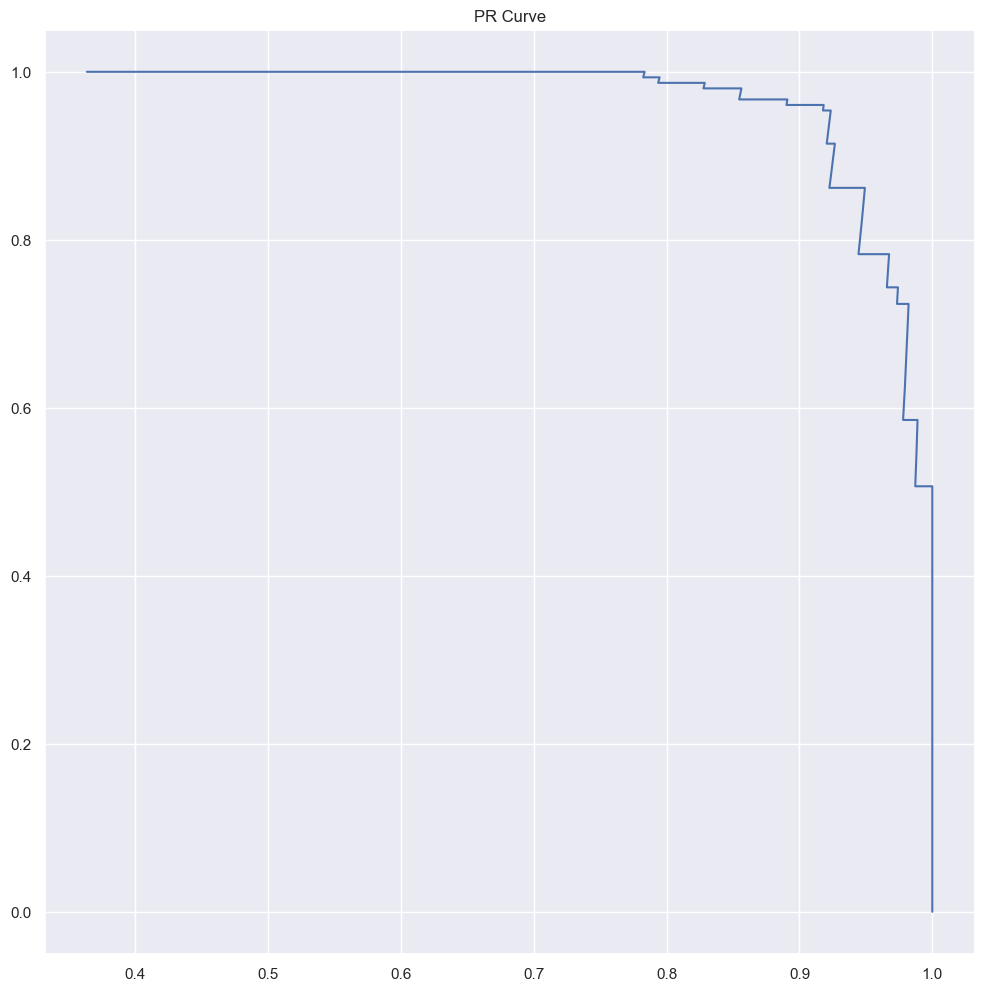

In [48]:
from matplotlib import pyplot as plt

plt.rc('figure', figsize=(12,12))
plt.plot(precision, recall)
plt.title("PR Curve")

## ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's performance across different threshold values. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR). Here's a detailed explanation of the key components and metrics:

### Key Components:

1. **True Positive Rate (TPR) / Sensitivity / Recall:**
   - Formula: $\(\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}\)$
   - Meaning: It is the proportion of actual positives that are correctly identified by the classifier. It indicates how well the model can identify positive instances.

2. **False Positive Rate (FPR):**
   - Formula: $\(\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}\)$
   - Meaning: It is the proportion of actual negatives that are incorrectly identified as positives by the classifier. It indicates how often the model falsely identifies a negative instance as positive.

3. **Thresholds:**
   - The ROC curve is created by varying the decision threshold of the classifier. Each point on the ROC curve represents a different threshold.

### Metrics:

1. **ROC Curve:**
   - The ROC curve plots TPR (y-axis) against FPR (x-axis) at various threshold settings. It shows the trade-off between sensitivity and specificity.

2. **ROC AUC Score (Area Under the Curve):**
   - The ROC AUC score quantifies the overall ability of the classifier to discriminate between positive and negative classes.
   - AUC ranges from 0 to 1:
     - 1.0 indicates a perfect classifier.
     - 0.5 indicates a classifier with no discriminative power, equivalent to random guessing.
     - Below 0.5 indicates a classifier performing worse than random guessing.

### Interpretation:
- **Ideal Classifier:**
  - An ideal classifier would have a ROC curve that passes through the top-left corner (TPR=1, FPR=0), meaning it perfectly separates positive and negative instances.
  
- **Classifier with Good Performance:**
  - A ROC curve that is closer to the top-left corner and has a high AUC (e.g., >0.8) indicates good performance.
  
- **Classifier with Poor Performance:**
  - A ROC curve close to the diagonal line (TPR=FPR) and an AUC close to 0.5 indicates poor performance.

### Example Provided below:

In this example, the ROC curve and the AUC score will help you understand how well the logistic regression model distinguishes between positive and negative classes across different thresholds.

In [49]:
fpr, tpr, thresholds = roc_curve(values, predictions)
fpr, tpr, thresholds

(array([0.        , 0.04511278, 1.        ]),
 array([0.        , 0.95394737, 1.        ]),
 array([inf,  1.,  0.]))

In [50]:
roc_auc = roc_auc_score(values, predictions)
auc_score = auc(fpr, tpr)
roc_auc

np.float64(0.9544172932330828)

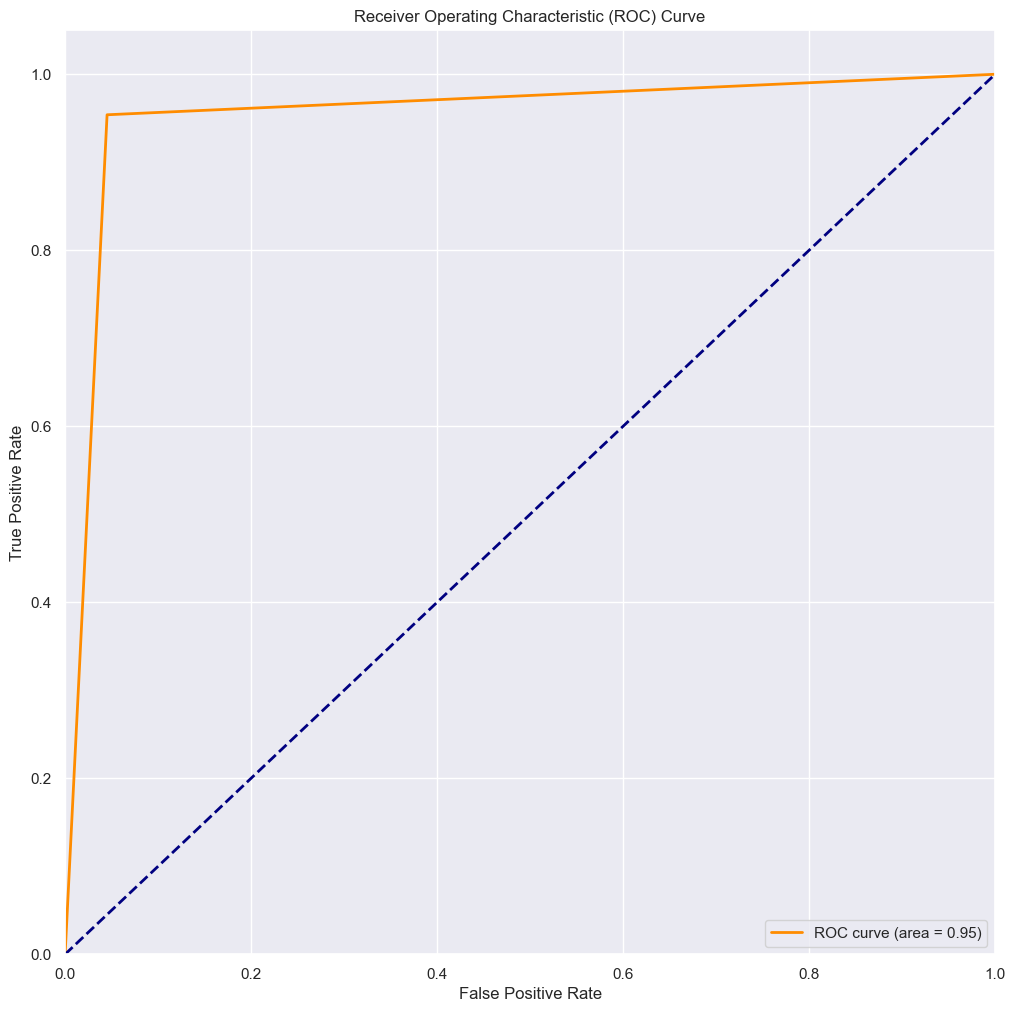

In [51]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Graph Limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Decors
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Grid Search CV

In [51]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [52]:
solver = ['saga', 'sag', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]

# params = {
#     'C':[100, 10, 1, 0.1, 0.01],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'solver': ['saga', 'sag', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
# }

params = dict(C=c_values, penalty=penalty, solver=solver)
params

{'C': [100, 10, 1, 0.1, 0.01],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['saga',
  'sag',
  'lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky']}

In [53]:
model = LogisticRegression(max_iter=5000)
cv_set = StratifiedKFold(5)

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='recall',
    cv=cv_set,
)

In [54]:
# For Each of the Parameter Comb. Model
grid.fit(X, y)

C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more detai

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'sag', 'lbfgs', 'liblinear',
                                    'newton-cg', 'newton-cholesky']},
             scoring='recall')

In [55]:
y_pred = grid.predict(test_df[cols])
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
precision = precision_score(values, y_pred)
recall = recall_score(values, y_pred)
precision, recall

(np.float64(0.9235668789808917), np.float64(0.9539473684210527))

In [57]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}